In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os

import scipy.io
from scipy import stats
from scipy.signal import savgol_filter
import octopus as oct

In [2]:
voltage_traces_coh_tuning = pd.read_hdf('coh_tuning.hd5')

In [3]:
voltage_traces_coh_tuning.tail()

,ND_frac,PD_frac,cellname,celltype,coh_tuning,curr_inj,dotsize,time,voltage
172636,0.5,0.5,VS9,Block,0.0,0,4.0,0.20,7.285013
172637,0.5,0.5,VS9,Block,0.0,0,4.0,0.19,7.425660
172638,0.5,0.5,VS9,Block,0.0,0,4.0,0.24,7.478927
172639,0.5,0.5,VS9,Block,0.0,0,4.0,0.18,8.056977
172640,0.5,0.5,VS9,Block,0.0,0,4.0,0.17,8.079590


In [4]:
coh_tuning = ['-0.5', '-0.375', '-0.25', '-0.125', '0', '0.125', '0.25', '0.375', '0.5']
coh = np.array([-0.5, -0.375, -0.25, -0.125, 0, 0.125, 0.25, 0.375, 0.5])*2
cellname_ctrl = ['VS1', 'VS2', 'VS3', 'VS4', 'VS5', 'VS6', 'VS7']
cellname = ['VS1', 'VS2', 'VS3', 'VS4', 'VS5', 'VS6', 'VS7', 'VS8', 'VS9']
time = np.linspace(0, 11.95, 1195)

In [5]:
for j in range(len(cellname_ctrl)):

    for i in range(len(coh_tuning)):
    
        a = voltage_traces_coh_tuning.query('celltype == "Control" and coh_tuning == '+ str(coh_tuning[i])+' and cellname == "'+ str(cellname_ctrl[j])+'"').\
        sort_values(by='time').loc[:,"voltage"].to_numpy()
    
        if(i==0):
            Ftrace_all = a[0:1195]
        if(i==1):
            Ftrace_all = np.stack((Ftrace_all, a[0:1195]), axis=1)  
        if(i>1):
            a = a[:,np.newaxis]
            Ftrace_all = np.concatenate((Ftrace_all, a[0:1195]), axis=1)
    
    if(j==0):
        Etrace_all_ctrl = Ftrace_all
    if(j==1):
        Etrace_all_ctrl = np.stack((Etrace_all_ctrl, Ftrace_all), axis=2)  
    if(j>1):
        Ftrace_all = Ftrace_all[:,:,np.newaxis]
        Etrace_all_ctrl = np.concatenate((Etrace_all_ctrl, Ftrace_all), axis=2)

In [6]:
for j in range(len(cellname)):

    for i in range(len(coh_tuning)):
    
        a = voltage_traces_coh_tuning.query('celltype == "Block" and coh_tuning == '+ str(coh_tuning[i])+' and cellname == "'+ str(cellname[j])+'"').\
        sort_values(by='time').loc[:,"voltage"].to_numpy()
    
        if(i==0):
            Ftrace_all = a[0:1195]
        if(i==1):
            Ftrace_all = np.stack((Ftrace_all, a[0:1195]), axis=1)  
        if(i>1):
            a = a[:,np.newaxis]
            Ftrace_all = np.concatenate((Ftrace_all, a[0:1195]), axis=1)
    
    if(j==0):
        Etrace_all_block = Ftrace_all
    if(j==1):
        Etrace_all_block = np.stack((Etrace_all_block, Ftrace_all), axis=2)  
    if(j>1):
        Ftrace_all = Ftrace_all[:,:,np.newaxis]
        Etrace_all_block = np.concatenate((Etrace_all_block, Ftrace_all), axis=2)

In [7]:
Etrace_mean_block = np.mean(Etrace_all_block, 2)
Etrace_mean_ctrl = np.mean(Etrace_all_ctrl, 2)

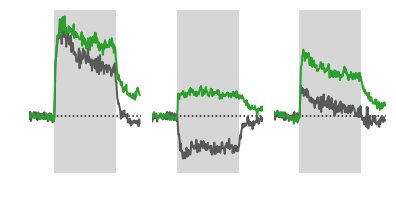

In [8]:
fig = plt.figure(figsize = (6.4,3))

plt.subplots_adjust(wspace = 0.1)

ax = fig.add_subplot(131)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time[0::4], Etrace_mean_ctrl[0::4, 8], color = '0.35', linewidth = 2)
plt.plot(time[0::4], Etrace_mean_block[0::4, 8], color = 'C2', linewidth = 2)
plt.axvspan(5, 10, facecolor='0.2', alpha=0.2)
plt.xlim([3,12])
plt.ylim([-4.5,8.5])
plt.axis('off')

ax = fig.add_subplot(132)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time[0::4], Etrace_mean_ctrl[0::4, 0], color = '0.35', linewidth = 2)
plt.plot(time[0::4], Etrace_mean_block[0::4, 0], color = 'C2', linewidth = 2)
plt.axvspan(5, 10, facecolor='0.2', alpha=0.2)
plt.xlim([3,12])
plt.ylim([-4.5,8.5])
plt.axis('off') 

ax = fig.add_subplot(133)
ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1.5)
plt.plot(time[0::4], Etrace_mean_ctrl[0::4, 4], color = '0.35', linewidth = 2)
plt.plot(time[0::4], Etrace_mean_block[0::4, 4], color = 'C2', linewidth = 2)
plt.axvspan(5, 10, facecolor='0.2', alpha=0.2)
plt.xlim([3,12])
plt.ylim([-4.5,8.5])
plt.axis('off')

bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
Fig5_VS_TM_ephys_50384block_traces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [8]:
mean_resp_ctrl = np.mean(Etrace_all_ctrl[500:1000, :, :], 0)
mean_resp_block = np.mean(Etrace_all_block[500:1000, :, :], 0)

In [9]:
# Calculate Motion Opponent Suppression Index
MOSI_Ctrl = (mean_resp_ctrl[8,:] - mean_resp_ctrl[4,:]) / (mean_resp_ctrl[8,:])
MOSI_Block = (mean_resp_block[8,:] - mean_resp_block[4,:]) / (mean_resp_block[8,:])

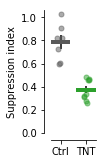

In [12]:
# Make Scatter Plot of MOSI

pos = [0,1]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [MOSI_Ctrl, MOSI_Block]
colors = ['0.35', 'C2']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl','TNT'), size=10)
ax.set_ylabel('Suppression index', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([0,1.06])

bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
Fig5_VS_TM_ephys_50384block_MOSI.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

In [10]:
print(stats.shapiro(MOSI_Ctrl))
print(stats.shapiro(MOSI_Block))
print(stats.levene(MOSI_Ctrl, MOSI_Block))
print(stats.ttest_ind(MOSI_Ctrl, MOSI_Block, equal_var=True))

(0.9479305148124695, 0.7108297944068909)
(0.851439356803894, 0.0772889256477356)
LeveneResult(statistic=1.0854840401104895, pvalue=0.31513244282652725)
Ttest_indResult(statistic=6.651527755100591, pvalue=1.0934023102043855e-05)


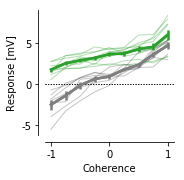

In [12]:
fig = plt.figure(figsize = (2.3, 2.3))

ax = fig.add_subplot(111) #PLOT directional tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(coh, mean_resp_ctrl, color='0.35', linewidth = 1, zorder = 0, alpha=0.35)
plt.plot(coh, np.mean(mean_resp_ctrl,1), linewidth = 2.5, color = '0.35')
plt.errorbar(coh, np.mean(mean_resp_ctrl,1), yerr = stats.sem(mean_resp_ctrl,1), linewidth = 2.5, color = '0.5')

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(coh, mean_resp_block, color='C2', linewidth = 1, zorder = 0, alpha=0.35)
plt.plot(coh, np.mean(mean_resp_block,1), linewidth = 2.5, color = 'C2')
plt.errorbar(coh, np.mean(mean_resp_block,1), yerr = stats.sem(mean_resp_block,1), linewidth = 2.5, color = 'C2')


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
#for axis in ['top','bottom','left','right']:
#  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel('Coherence', fontsize = 10)
ax.set_ylabel('Response [mV]', fontsize = 10)
xticks = np.array([-1, 0, 1])
ax.set_xticklabels([-1, 0, 1], size=10)
ax.set_xticks(xticks)
ax.set_yticks([-5, 0, 5])
ax.set_yticklabels([-5, 0, 5], size=10)


bbox_inches = 'tight'
plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
Fig5_VS_TM_ephys_50384block_coh_tuning.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

In [14]:
diff = (np.mean(mean_resp_ctrl,1) - np.mean(mean_resp_block,1))*-1

slope: 3.505781 intercept: 3.638606 r : 0.965658 p: 0.000024 se: 0.356513


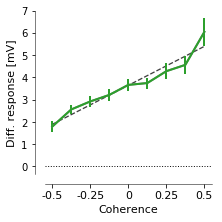

In [16]:
slope, intercept, r, p, se = stats.linregress(coh, np.mean(mean_resp_block,1))
print("slope: %f intercept: %f r : %f p: %f se: %f" % (slope, intercept, r, p, se))

fig = plt.figure(figsize = (3,3))

plt.subplots_adjust(wspace=0.3)
colors = sb.color_palette('husl', len(coh_tuning))

ax = fig.add_subplot(111) #PLOT directional tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(coh, np.mean(mean_resp_block,1), linewidth = 2, color = '0.5')
plt.errorbar(coh, np.mean(mean_resp_block,1), yerr = stats.sem(mean_resp_block,1), linewidth = 2, color = 'C2')
plt.plot(coh, intercept + slope*(coh), color = '0.25', LineWidth = '1.3', zorder=0, linestyle='--')


#plt.xticks(coh)
#ax.set_xticklabels(coh)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel('Coherence', fontsize = 11)
ax.set_ylabel('Diff. response [mV]', fontsize = 11)
xticks = np.array([-0.5, -0.25, 0, 0.25, 0.5])
ax.set_xticklabels([-0.5, -0.25, 0, 0.25, 0.5], size=11)
ax.set_xticks(xticks)
#plt.ylim([0,5])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#Fig5_VS_TM_ephys_50384block_coh_ctrl_reg.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

slope: 6.655194 intercept: 1.121423 r : 0.991777 p: 0.000000 se: 0.324579


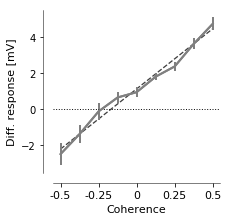

In [17]:
slope, intercept, r, p, se = stats.linregress(coh, np.mean(mean_resp_ctrl,1))
print("slope: %f intercept: %f r : %f p: %f se: %f" % (slope, intercept, r, p, se))

fig = plt.figure(figsize = (3,3))

plt.subplots_adjust(wspace=0.3)
colors = sb.color_palette('husl', len(coh_tuning))

ax = fig.add_subplot(111) #PLOT directional tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(coh, np.mean(mean_resp_ctrl,1), linewidth = 2, color = '0.5')
plt.errorbar(coh, np.mean(mean_resp_ctrl,1), yerr = stats.sem(mean_resp_ctrl,1), linewidth = 2, color = '0.5')
plt.plot(coh, intercept + slope*(coh), color = '0.25', LineWidth = '1.3', zorder=0, linestyle='--')


#plt.xticks(coh)
#ax.set_xticklabels(coh)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel('Coherence', fontsize = 11)
ax.set_ylabel('Diff. response [mV]', fontsize = 11)
xticks = np.array([-0.5, -0.25, 0, 0.25, 0.5])
ax.set_xticklabels([-0.5, -0.25, 0, 0.25, 0.5], size=11)
ax.set_xticks(xticks)
#plt.ylim([0,5])

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#Fig5_VS_TM_ephys_50384block_coh_ctrl_reg.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

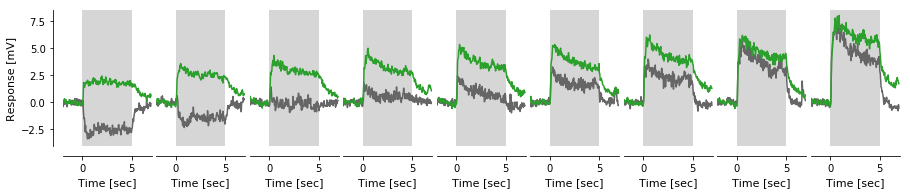

In [18]:
fig = plt.figure(figsize = (15,2.5))
fig.subplots_adjust(hspace=0.1, wspace=0.05)

for i in range (0, 9):
    ax = fig.add_subplot(1, 9, i+1)
    
    ax.plot(time[0::4], Etrace_mean_ctrl[0::4, i], color = '0.4', linewidth='1.5')
    ax.plot(time[0::4], Etrace_mean_block[0::4, i], color = 'C2', linewidth='1.5')
    
    plt.xlim([3,12])
    plt.axvspan(5, 10, facecolor='0.2', alpha=0.2)
    xticks = np.array([5, 10])
    ax.set_xticklabels([0, 5], size=11)
    ax.set_xticks(xticks)
    ax.set_ylim([-4,8.5])
    if i == 0:
        ax.set_ylabel('Response [mV]', size=11)
        ax.spines['left'].set_position(('outward', 10))
    if i in range(0,9):
        ax.spines["top"].set_visible(False)
        ax.set_xlabel('Time [sec]', size=11)
        ax.spines['bottom'].set_position(('outward', 10))
    if i in range(1,9):
        ax.spines["left"].set_visible(False)
        ax.get_yaxis().set_visible(False) 
    if i in range(0,9):
        ax.spines["right"].set_visible(False) 
          
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\
#FigSX_R24E09_ArcLight_Traces_alldir.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()